In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date, datetime
from vola_surface import VolatilitySurface
import matplotlib.pyplot as plt

In [4]:
def compute_year_fraction(d1: date, d2: date) -> float:
    if isinstance(d1, date) and isinstance(d2, date):
        total_days = (d2 - d1).days + 1
        year_days = 366 if (d1.year % 4 == 0 and (d1.year % 100 != 0 or d1.year % 400 == 0)) else 365
        return total_days / year_days
    else:
        raise TypeError("Both d1 and d2 must be instances of datetime.date.")
    
def get_maturity(contract_symbol: str):

    tickername = "NVDA"
    contract_symbol = contract_symbol.removeprefix(tickername)
    if contract_symbol[0] =="W":
        contract_symbol = contract_symbol[1:7]
    else: 
        contract_symbol = contract_symbol[:6]
    maturity_date = datetime.strptime(contract_symbol, "%y%m%d")
    maturity = compute_year_fraction(datetime.today(), maturity_date)

    return maturity


In [7]:
tk = yf.Ticker("NVDA") #SPY, TSLA, AAPL

stock_info = tk.info
current_price = stock_info.get("regularMarketPrice", None)

option_expiries = tk.options


for i, expiry in enumerate(option_expiries):

    if i == 0:
        df = pd.DataFrame(tk.option_chain(expiry).calls)[["contractSymbol","strike", "impliedVolatility", "volume"]]
    else:
        df = pd.concat([df, tk.option_chain(expiry).calls[["contractSymbol","strike", "impliedVolatility", "volume"]]])

df["maturity"] = df["contractSymbol"].apply(get_maturity)
print(df)

         contractSymbol  strike  impliedVolatility  volume  maturity
0   NVDA250613C00015000    15.0           5.000004     5.0  0.016438
1   NVDA250613C00020000    20.0           4.375005     5.0  0.016438
2   NVDA250613C00025000    25.0           3.875000     1.0  0.016438
3   NVDA250613C00030000    30.0           3.500001     1.0  0.016438
4   NVDA250613C00035000    35.0           3.125002     3.0  0.016438
..                  ...     ...                ...     ...       ...
42  NVDA271217C00230000   230.0           0.498296   113.0  2.528767
43  NVDA271217C00240000   240.0           0.497228     2.0  2.528767
44  NVDA271217C00250000   250.0           0.495870    51.0  2.528767
45  NVDA271217C00260000   260.0           0.495565     2.0  2.528767
46  NVDA271217C00270000   270.0           0.494649   179.0  2.528767

[3168 rows x 5 columns]


In [ ]:
df = pd.DataFrame(tk.option_chain(expiry).calls)

df

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NVDA271217C00005000,2025-06-05 16:33:39+00:00,5.0,138.95,137.15,138.15,-0.050003,-0.035973,2,319,1.335941,True,REGULAR,USD
1,NVDA271217C00010000,2025-06-06 13:57:58+00:00,10.0,134.33,132.55,134.45,1.630005,1.228338,2,144,1.166996,True,REGULAR,USD
2,NVDA271217C00015000,2025-06-04 18:01:42+00:00,15.0,128.70,127.75,130.80,0.000000,0.000000,48,130,1.055669,True,REGULAR,USD
3,NVDA271217C00020000,2025-06-06 18:19:24+00:00,20.0,125.52,123.90,125.80,4.379997,3.615649,17,293,0.957642,True,REGULAR,USD
4,NVDA271217C00025000,2025-06-04 18:41:29+00:00,25.0,120.47,119.20,122.20,0.000000,0.000000,5,231,0.903077,True,REGULAR,USD
5,NVDA271217C00030000,2025-06-05 18:15:32+00:00,30.0,117.50,115.40,117.25,2.250000,1.952278,2,505,0.842409,True,REGULAR,USD
6,NVDA271217C00035000,2025-06-06 18:14:41+00:00,35.0,113.11,111.30,113.10,2.559998,2.315692,1,1003,0.803347,True,REGULAR,USD
7,NVDA271217C00040000,2025-06-06 18:14:41+00:00,40.0,109.03,107.20,109.00,-0.300003,-0.274401,8,325,0.768557,True,REGULAR,USD
8,NVDA271217C00045000,2025-06-05 13:52:51+00:00,45.0,104.08,103.25,104.95,0.610001,0.589543,1,353,0.739749,True,REGULAR,USD
9,NVDA271217C00050000,2025-06-06 19:06:16+00:00,50.0,100.53,99.35,101.00,2.029999,2.060913,8,910,0.714541,True,REGULAR,USD


In [ ]:
pivot = df.pivot_table(index="strike", columns="maturity", values="impliedVolatility")
pivot

maturity,0.016438,0.035616,0.054795,0.071233,0.093151,0.112329,0.189041,0.284932,0.361644,0.457534,0.534247,0.610959,0.783562,1.030137,1.282192,1.531507,1.608219,2.027397,2.528767
strike,,,,,,,,,,,,,,,,,,,
0.5,NaN,14.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.187504,3.867188,NaN,4.023442,NaN,3.578126,NaN,NaN,NaN
1.0,NaN,11.500003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.109380,2.875003,NaN,4.070317,NaN,3.199221,NaN,NaN,NaN
1.5,NaN,0.000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,3.203127,NaN,2.695316,NaN,2.449223,NaN,NaN,NaN
2.0,NaN,9.437504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,3.011721,NaN,2.242192,NaN,1.695314,NaN,NaN,NaN
2.5,NaN,0.000010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,0.000010,NaN,0.000010,NaN,1.613283,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300.0,NaN,11.510013,NaN,NaN,NaN,NaN,NaN,4.834232,NaN,NaN,4.087957,3.975342,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2350.0,NaN,11.270267,NaN,NaN,NaN,NaN,NaN,4.728154,NaN,NaN,3.967468,NaN,NaN,3.885254,NaN,0.000000,NaN,NaN,NaN
2400.0,NaN,11.049686,NaN,NaN,NaN,NaN,NaN,4.625370,NaN,NaN,3.870850,3.752930,NaN,3.706788,NaN,0.000000,NaN,NaN,NaN


In [ ]:
pivot = df.pivot_table(index="strike", columns="maturity", values="impliedVolatility")
#pivot.dropna(axis=0, inplace=True)
#pivot.fillna(0)
# Get sorted axes
strikes = sorted(pivot.index.to_list())
maturities = sorted(pivot.columns.to_list())
vol_matrix = pivot.loc[strikes, maturities].values.tolist()

vol_matrix

[[nan,
  14.00000125,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  5.187503515625,
  3.86718783203125,
  nan,
  4.0234424707031256,
  nan,
  3.5781260546875,
  nan,
  nan,
  nan],
 [nan,
  11.5000028125,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  4.10937986328125,
  2.8750028125,
  nan,
  4.070317412109375,
  nan,
  3.1992207519531246,
  nan,
  nan,
  nan],
 [nan,
  1.0000000000000003e-05,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.0000000000000003e-05,
  3.2031269921874994,
  nan,
  2.69531576171875,
  nan,
  2.4492226269531248,
  nan,
  nan,
  nan],
 [nan,
  9.4375041015625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.0000000000000003e-05,
  3.0117212207031248,
  nan,
  2.2421918945312496,
  nan,
  1.6953140234375002,
  nan,
  nan,
  nan],
 [nan,
  1.0000000000000003e-05,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  1.0000000000000003e-05,
  1.0000000000000003e-05,
  nan,
  1.0000000000000003e-05,
  nan,
  1.61

In [ ]:
vol_surface = VolatilitySurface(strikes, maturities, vol_matrix)

vol_surface.get_original_grid_as_dataframe()

,0.000000,0.019178,0.038356,0.057534,0.073973,0.095890,0.115068,0.191781,0.287671,0.364384,0.460274,0.536986,0.613699,0.786301,1.032877,1.284932,1.534247,1.610959,2.030137,2.531507
85.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
95.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
100.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
105.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
110.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
115.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
120.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
125.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
130.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
135.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010


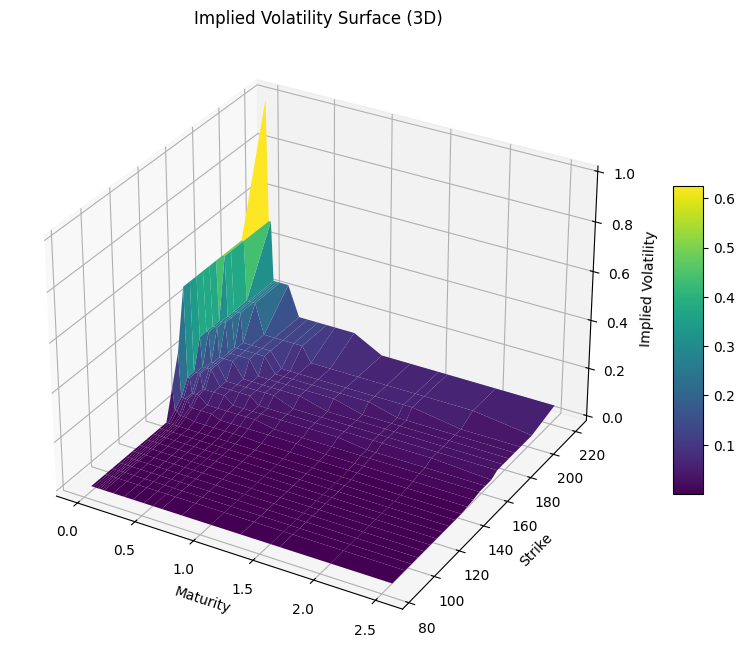

In [ ]:
X, Y = np.meshgrid(pivot.columns, pivot.index)
Z = pivot.values

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Maturity')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface (3D)')

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Optimal SVI params: [ 0.08037973  0.41184265 -0.60836921  0.10975761  0.26337746]


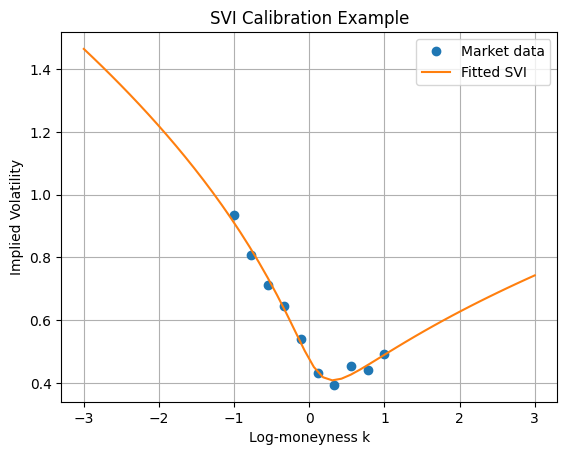

In [ ]:
from svioptimizer import SVI
import numpy as np

k_market = np.linspace(-1, 1, 10)
true_params = [0.1, 0.4, -0.662, 0.1, 0.23]  # some SVI parameters
iv_market = SVI.svi_implied_vol(true_params, k_market) + np.random.normal(0, 0.02, size=k_market.shape)

opt = SVI(initial_params=[0.05, 0.1, 0.0, 0.0, 0.2])

opt_params = opt.optimize(k_market, iv_market)
print("Optimal SVI params:", opt_params)

# Evaluate at new points
k_new = np.linspace(-3, 3, 50)
iv_fit = opt.evaluate(k_new)

# Plotting (optional)
import matplotlib.pyplot as plt

plt.plot(k_market, iv_market, 'o', label='Market data')
plt.plot(k_new, iv_fit, '-', label='Fitted SVI')
plt.legend()
plt.xlabel('Log-moneyness k')
plt.ylabel('Implied Volatility')
plt.title('SVI Calibration Example')
plt.grid(True)
plt.show()
    
    